In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir plastico 
!mkdir vidrio
!mkdir latas
!mkdir organicos

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd plastico
!unzip plastico.zip
%cd ..

%cd latas
!unzip lata.zip
%cd ..

%cd organicos
!unzip organico.zip
%cd ..

%cd vidrio
!unzip vidrio.zip
%cd ..

/content/plastico
Archive:  plastico.zip
   creating: plastico/
  inflating: plastico/-terephthalate-water-bo-plastic-bottle-5a7559097d45e2.6773165915176399455131.jpg  
  inflating: plastico/01-waterbottlesun_20190719_0023.jpg  
  inflating: plastico/01_bottle_mm9070_190418_2400-2.jpg  
  inflating: plastico/02_bottle_mm9070_190418_2431-1-gif.gif  
  inflating: plastico/1200px-1989_HK_Sheung_Wan_Bonham_Strand_VITA_Distilled_Water.jpg  
  inflating: plastico/133_2015_peligros-reuso-botella-plastico.jpg  
  inflating: plastico/1366_2000.jpg  
  inflating: plastico/1446223.png    
  inflating: plastico/150922175235_bottle_water_624x351_thinkstock.jpg  
  inflating: plastico/161__25_rotador.jpg  
  inflating: plastico/20171107162553282_1510068806_asset_still.png  
  inflating: plastico/2520535.jpeg   
  inflating: plastico/2557684.jpeg   
  inflating: plastico/2806181.jpeg   
  inflating: plastico/3266-imagen-seguridad_alimentaria_botellas_plastico.jpg  
  inflating: plastico/450_1000.webp

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/latas/lata.zip
!rm -rf /content/organicos/organico.zip
!rm -rf /content/plastico/plastico.zip
!rm -rf /content/vidrio/vidrio.zip

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/latas/lata | wc -l #206
!ls /content/organicos/organico | wc -l #227
!ls /content/plastico/plastico | wc -l #223
!ls /content/vidrio/vidrio  | wc -l #269

206
227
223
249


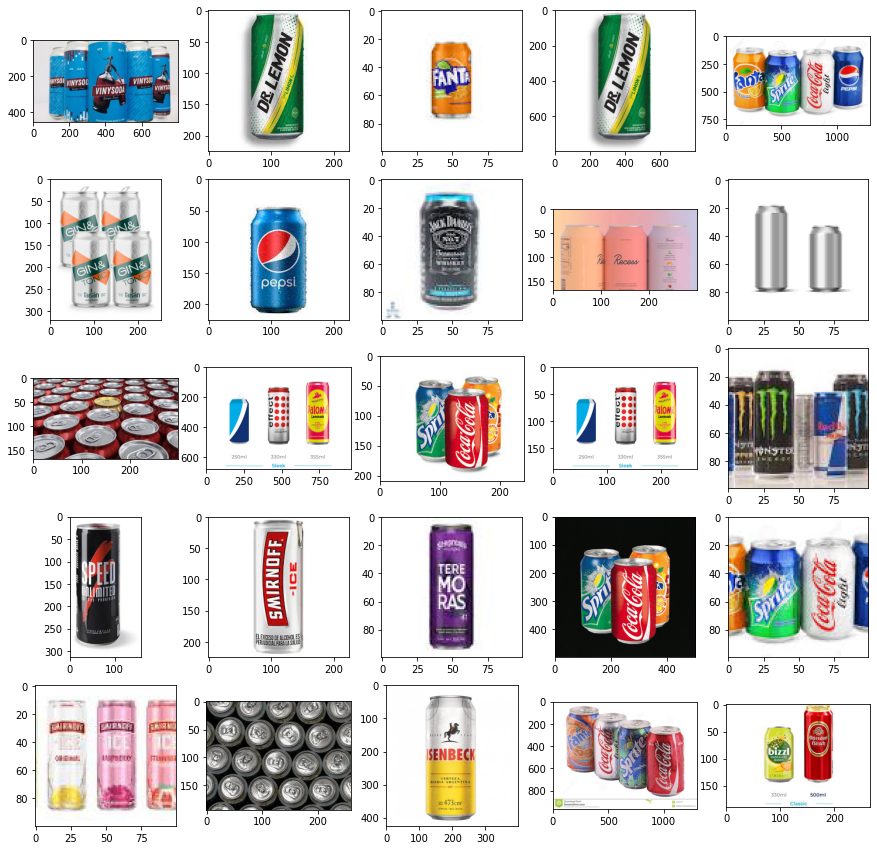

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/latas/lata'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

COMENTARIO: Tensorflow tiene formas oficiales para hacer set de datos y que puedan ser tan grandes como sea necesario sin que se cargen todos en memoria a la vez 

In [ ]:
#Crear carpetas para hacer el set de datos
# 
!mkdir dataset
!mkdir dataset/latas
!mkdir dataset/organico
!mkdir dataset/plastico
!mkdir dataset/vidrio

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 206 (el num. menor de imagenes que subi) **LATAS**
import shutil
carpeta_fuente = '/content/latas/lata'
carpeta_destino = '/content/dataset/latas'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 206:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#**ORGANICOS**
carpeta_fuente = '/content/organicos/organico'
carpeta_destino = '/content/dataset/organico'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 206:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#**PLASTICO**
carpeta_fuente = '/content/plastico/plastico'
carpeta_destino = '/content/dataset/plastico'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 206:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#**VIDRIO**
carpeta_fuente = '/content/vidrio/vidrio'
carpeta_destino = '/content/dataset/vidrio'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 206:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/dataset/latas | wc -l #206
!ls /content/dataset/organico | wc -l #227
!ls /content/dataset/plastico | wc -l #206
!ls /content/dataset/vidrio | wc -l #206

206
206
206
206


Found 632 images belonging to 4 classes.
Found 156 images belonging to 4 classes.


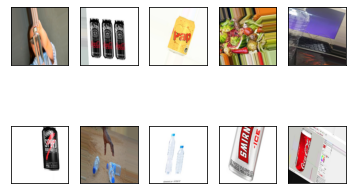

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,          #normalizamos las imagenes para que nos de entre 0 y 1
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas y 80% para entrenamiento
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),    #redimencionamos la imagen en 224 x 224
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()
# COMENTARIO: podemos ver que las imagenes estan mescladas y estan giradas o invertidas para tener mas muestras y ahora todas las imagenes son de 224x224

In [ ]:
#importamos la red neuronal mobilenet_V2 (es la red sin la ultima capa) en la cual le vamos a cargar nuestas entradas
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3)) #cargamos la forma de entrada que espera el modelo

In [ ]:
#antes de modelar necesitamos congelar los sesgos y parametros
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
#realizamos el modelado
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(4, activation='softmax') #cargamos nuestra ultima capa con las 4 opciones posibles
])

In [ ]:
modelo.summary()
#COMENTARIO: como podemos observar ahora tenemos un total de 2.263.108 de parametros

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar 
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
20/20 [==============================] - ETA: 0s - loss: 1.0971 - accuracy: 0.5269

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


20/20 [==============================] - 30s 829ms/step - loss: 1.0971 - accuracy: 0.5269 - val_loss: 0.7402 - val_accuracy: 0.7051
Epoch 2/50
20/20 [==============================] - 14s 715ms/step - loss: 0.6335 - accuracy: 0.7484 - val_loss: 0.5255 - val_accuracy: 0.8205
Epoch 3/50
20/20 [==============================] - 14s 725ms/step - loss: 0.5198 - accuracy: 0.8006 - val_loss: 0.3908 - val_accuracy: 0.8718
Epoch 4/50
20/20 [==============================] - 14s 727ms/step - loss: 0.4341 - accuracy: 0.8307 - val_loss: 0.4087 - val_accuracy: 0.8462
Epoch 5/50
20/20 [==============================] - 14s 735ms/step - loss: 0.4054 - accuracy: 0.8386 - val_loss: 0.3751 - val_accuracy: 0.8590
Epoch 6/50
20/20 [==============================] - 14s 718ms/step - loss: 0.3797 - accuracy: 0.8560 - val_loss: 0.3397 - val_accuracy: 0.9038
Epoch 7/50
20/20 [==============================] - 15s 766ms/step - loss: 0.3388 - accuracy: 0.8797 - val_loss: 0.3400 - val_accuracy: 0.9038
Epoch 8/50

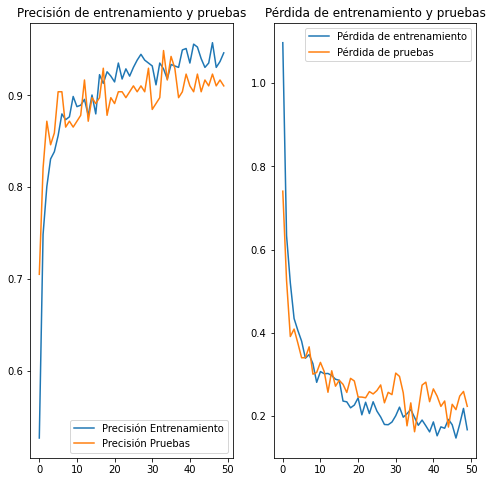

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
#COMENTARIO: el objetivo es sacar una imagen de internet por URL, pasarla por filtro de normalizacion  
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#COMENTARIO: la funcion recibe el URL , descarga la imagen y le hace las transformaciones necesarias
#0 = lata , 1 = organicos, 2 = plastico, 3=vidrio
url = 'https://th.bing.com/th/id/OIP.UrwQ82UlE8wu3oMw_po7jgHaEe?pid=ImgDet&rs=1' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1
